In [154]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [155]:
# Reading the uploaded CSV files
train_path = './kaggle/train.csv'
test_path = './kaggle/test.csv'
sample_submission_path = './kaggle/sample_submission.csv'


train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sample_submission = pd.read_csv(sample_submission_path)

# Displaying the first few rows of each dataset
train.head(), test.head(), sample_submission.head()

(   id  Marital status  Application mode  Application order  Course  \
 0   0               1                 1                  1    9238   
 1   1               1                17                  1    9238   
 2   2               1                17                  2    9254   
 3   3               1                 1                  3    9500   
 4   4               1                 1                  2    9500   
 
    Daytime/evening attendance  Previous qualification  \
 0                           1                       1   
 1                           1                       1   
 2                           1                       1   
 3                           1                       1   
 4                           1                       1   
 
    Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
 0                           126.0            1                       1  ...   
 1                           125.0            1               

In [156]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [157]:
train['Target'] = label_encoder.fit_transform(train['Target'])

In [158]:
X = train.drop(columns=['id','Target'])
y = train['Target']

In [159]:
train

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,2
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,0
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,0
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,1
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,2
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,2
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,1
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,0


In [160]:
# Convert features to numpy array
X_train = X.values
y_train = y.values

# Normalize the data (optional but recommended for better performance)
X_train = X_train / X_train.max(axis=0)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer with the number of features
    tf.keras.layers.Dense(16, activation="relu"),  # First hidden layer
    tf.keras.layers.Dense(16, activation="relu"),  # Second hidden layer
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax")  # Output layer
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_split=0.2)  # Use a validation split to evaluate performance during training

# Display the model summary
model.summary()

/Users/uttamkumarpanasala/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step - accuracy: 0.7784 - loss: 0.5602 - val_accuracy: 0.8129 - val_loss: 0.4824
Epoch 2/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - accuracy: 0.8098 - loss: 0.4931 - val_accuracy: 0.8148 - val_loss: 0.4810
Epoch 3/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.8106 - loss: 0.4891 - val_accuracy: 0.8140 - val_loss: 0.4798
Epoch 4/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.8128 - loss: 0.4850 - val_accuracy: 0.8166 - val_loss: 0.4754
Epoch 5/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.8140 - loss: 0.4836 - val_accuracy: 0.8157 - val_loss: 0.4742
Epoch 6/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.8145 - loss: 0.4824 - val_accuracy: 0.8165 - val_loss: 0.4734
Epoch 7/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.8152 - loss: 0.4812 - val_accuracy: 0.8167 - val_loss: 0.4726
Epoch 8/10
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 1s 488us/step - accuracy: 0.8151 -

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,747 (10.73 KB)

 Trainable params: 915 (3.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,832 (7.16 KB)

In [161]:
sample_submission['Target'] = label_encoder.fit_transform(sample_submission['Target'])
y_test = sample_submission["Target"].values

In [162]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
test = test.drop(columns=['id'])
test

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,1,1,9500,1,1,141.0,1,3,1,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,1,1,1,9238,1,1,128.0,1,1,19,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,1,1,1,9238,1,1,118.0,1,1,19,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,1,44,1,9147,1,39,130.0,1,1,19,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,1,39,1,9670,1,1,110.0,1,1,37,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,2,39,1,9119,1,19,133.1,1,19,37,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,1,1,1,171,1,1,127.0,1,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,1,1,3,9773,1,1,132.0,1,19,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [164]:
# Check the accuracy of our model
loss, accuracy = model.evaluate(test,
                                y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - accuracy: 0.9989 - loss: 0.0290
Model loss on test set: 0.029466910287737846
Model accuracy on test set: 99.90%


In [167]:
# Reading the uploaded CSV files
test_path = './kaggle/test.csv'
test_full = pd.read_csv(test_path)
# Displaying the first few rows of each dataset
test_full.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [166]:
# Make predictions
test = test_full.drop(columns=['id'])
predictions = model.predict(test)
predicted_classes = predictions.argmax(axis=1)
#predicted_labels = label_encoder.inverse_transform(predicted_classes)
predictions
# 
# # Prepare the submission file
# submission = pd.DataFrame({'id': test['id'], 'Target': predicted_labels})
# submission.to_csv('submission.csv', index=False)
# submission

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [93]:
sample_submission['Target']

0        0
1        0
2        0
3        0
4        0
        ..
51007    0
51008    0
51009    0
51010    0
51011    0
Name: Target, Length: 51012, dtype: int64

In [78]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

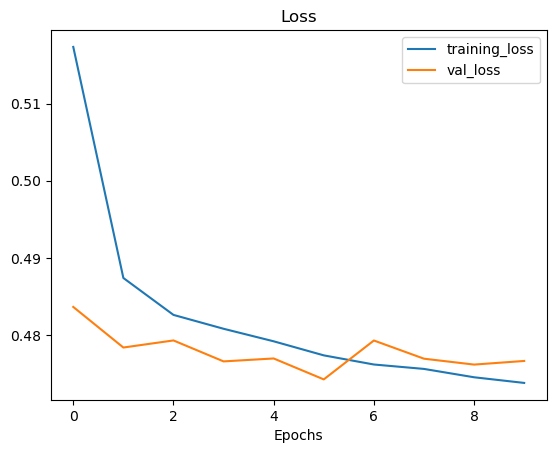

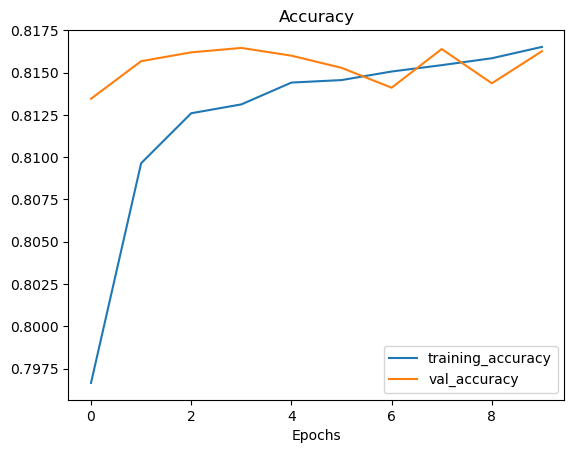

In [153]:
plot_loss_curves(history)